<h1>Chua Circuit</h1>
<h2>Solving the differential equations numerically</h2>


![alt text for screen readers](/home/_rion_/Documents/Semester-07/Non_linear_Dynamics_circuits/circuit diagram.png "Text to show on mouseover")

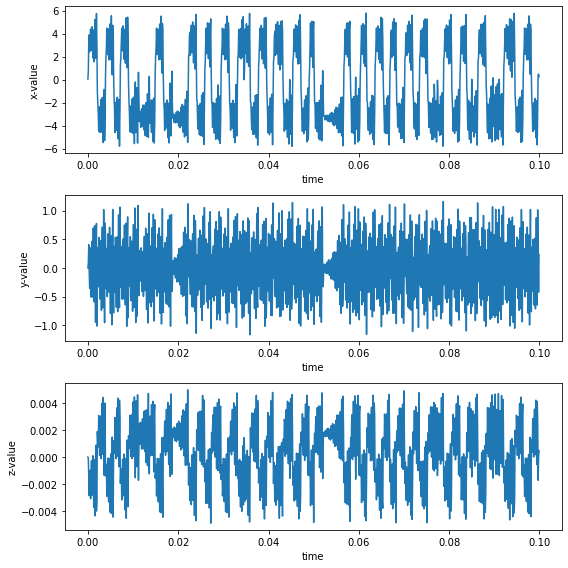

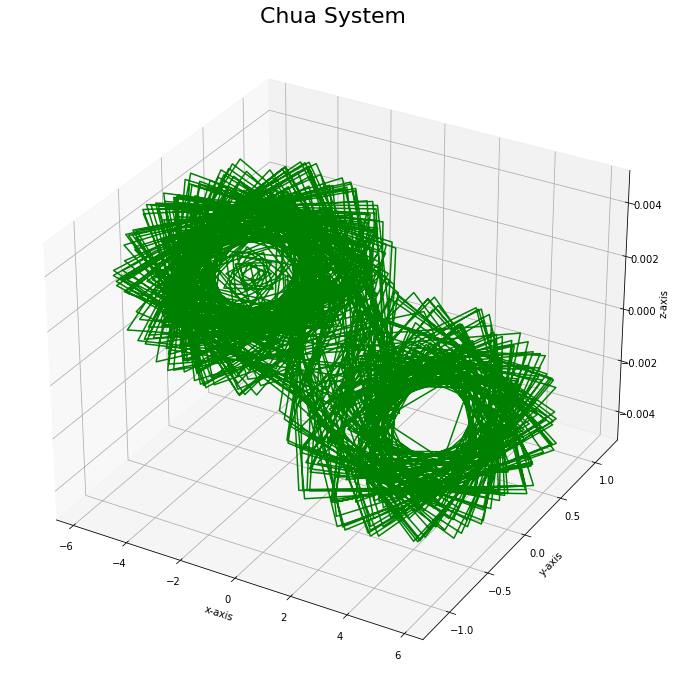

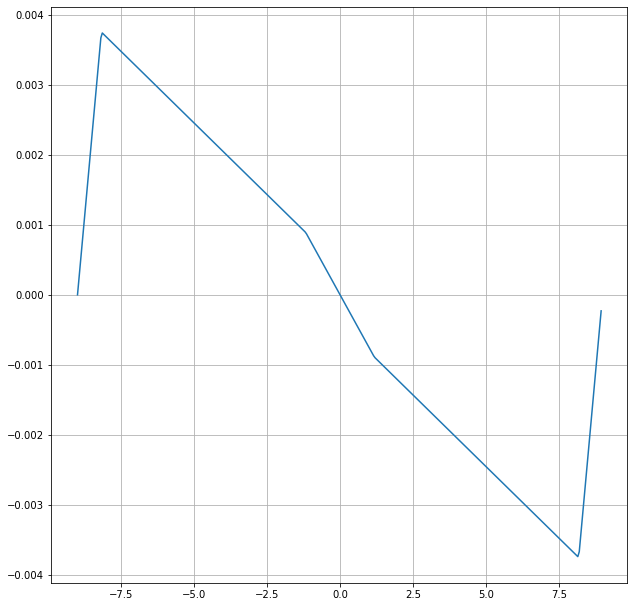

In [201]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits import mplot3d
# alpha  = 15
# beta   = 28
# m0     = -1.143
# m1     = -0.714
# E      = 5



C1  = 10*10**(-9)
C2  = 100*10**(-9)
R = 1.88*10**3
G = 1/R
L = 18*10**(-3)

    
R1 = 220
R2 = 220
R3 = 2200
R4 = 22000
R5 = 22000
R6 = 3300

Esat = 9
E1 = R3/(R2+R3)*Esat
E2 = R6/(R5+R6)*Esat
E = 1
m = np.array([-1/R6,1/R4, 1/R1,-1/R3])
# m12 = -1/R6
# m02 = 1/R4
# m01 = 1/R1
# m11 = -1/R3

def g(x,E1,E2,m):
    m1 = m[0]+m[3]
    if(E1>E2):
        m0 = m[3] + m[1]
    else:
        m0 = m[0] + m[2]   


    mm1 = m[2] + m[1]
    Emax = max([E1 , E2])
    Emin = min([E1 , E2])


    if abs(x) < Emin:
        g = x*m1     
    elif Emin < abs(x) < Emax :
        g = x*m0
        if x > 0:
            g += Emin*(m1-m0)   
        else:
            g += Emin*(m0-m1) 


    elif abs(x) >= Emax:
        g = x*mm1    
        if x > 0:
            g = g + Emax*(m0-mm1) + Emin*(m1-m0)
        else:
            g = g + Emax*(mm1-m0) +  Emin*(m0-m1)
    return g

#x->vc1 y->vc2 z->il G/C2 = 1
# Parameters
beta   = 1/L

m0     = -0.5
m1     = -0.8
h = lambda x : (m1*x+0.5*(m0-m1)*(abs(x+E)-abs(x-E)))
l = lambda x : g(x,E1,E2,m)

def f(b, t, params):
    x,y,z = b      # unpack current values of y
    G,C1,C2,L = params  # unpack parameters
    derivs = [(1/C1)*(G*(y-x)-l(x)), (1/C2)*(G*(x-y)+ z), -(1/L)*y]
    return derivs
# xdot = (1/C1)*(G*(y-x)-g);
# ydot = (1/C2)*(G*(x-y)+z);
# zdot  = -(1/L)*y;
# Initial values
x0 = 0.05# initial angular displacement
y0 = 0.0# initial angular velocity
z0 = 0.0

# Bundle parameters for ODE solver
params = [G,C1,C2,L]

# Bundle initial conditions for ODE solver
y0 = [x0, y0, z0]

# Make time array for solution
tStop = 0.1
tInc = 10**(-4)
t = np.arange(0., tStop, tInc)

# Call the ODE solver #jbsj
chua = odeint(f, y0, t, args=(params,))

#Plot results
fig = plt.figure(1, figsize=(8,8))

# Plot theta as a function of time
ax1 = fig.add_subplot(311)
ax1.plot(t, chua[:,0])
ax1.set_xlabel('time')
ax1.set_ylabel('x-value')

# Plot omega as a function of time
ax2 = fig.add_subplot(312)
ax2.plot(t, chua[:,1])
ax2.set_xlabel('time')
ax2.set_ylabel('y-value')

# Plot omega as a function of time
ax3 = fig.add_subplot(313)
ax3.plot(t, chua[:,2])
ax3.set_xlabel('time')
ax3.set_ylabel('z-value')




plt.tight_layout()
plt.show()

# ax4 = fig.add_subplot(314)
fig = plt.figure(figsize=(12,12))
 
# syntax for 3-D projection
ax4 = plt.axes(projection ='3d')
ax4.set_xlabel('x-axis')
ax4.set_ylabel('y-axis')
ax4.set_zlabel('z-axis')
 
ax4.plot3D(chua[:,0],chua[:,1],chua[:,2], 'green')
ax4.set_title('Chua System',fontsize=22)
plt.show()

fig1 = plt.figure(1, figsize=(8,8))
ax = fig1.add_axes([0,0,1,1])
a = np.arange(-9.0,9.0,0.05)
ax.plot(a,[l(i) for i in a])
plt.grid()
plt.show()

<h2>Animating the solution</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
 
# ANIMATION FUNCTION
def func(num, dataSet, line):
    #: there is no .set_data() for 3 dim data...
    line.set_data(dataSet[0:2, :num])    
    line.set_3d_properties(dataSet[2, :num])    
    return line
 
 
numDataPoints = len(chua[:,0])
 
# GET SOME MATPLOTLIB OBJECTS
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
dataSet = np.array([chua[:,0], chua[:,1], chua[:,2]])
#: Can't pass empty arrays into 3d version of plot()
line = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='g')[0] # For line plot
# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
ax.set_xlabel('X(t)')
ax.set_ylabel('Y(t)')
ax.set_zlabel('Z(t)')
ax.set_title('Chua system evolution',fontsize=22)
{{jdnk}
 
# Creating the Animation object
line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(dataSet,line), interval=50, blit=False)
#line_ani.save(r'Chua_system_evolution.mp4')
 
 
plt.show()

SyntaxError: invalid syntax (328393768.py, line 30)

<h1>Lorenz Circuit</h1>
<h2>Solving the differential equations numerically</h2>

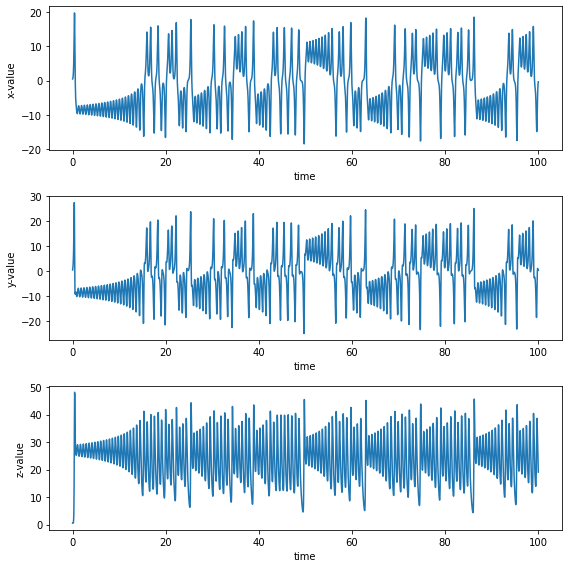

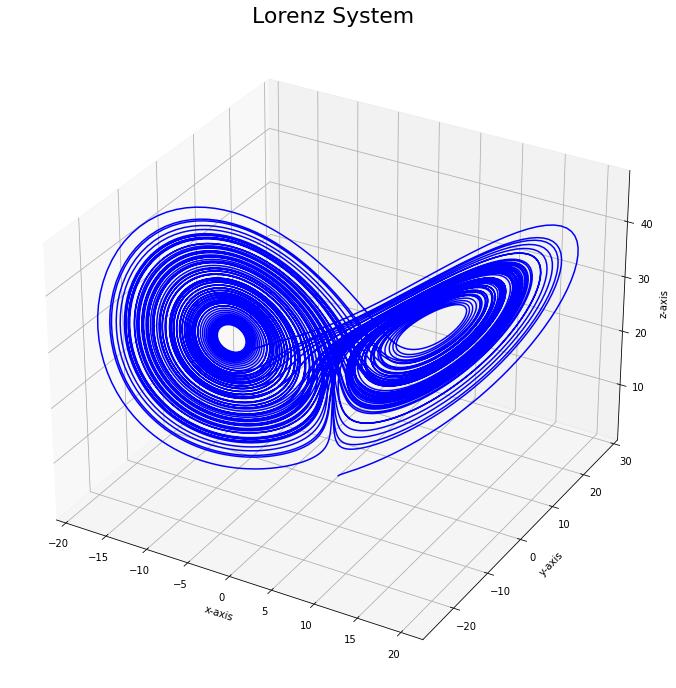

In [2]:

# Parameters
sigma = 10
R = 28
b = 8/3

h = lambda x : m1*x+0.5*(m0-m1)*(abs(x+E)-abs(x-E))


def f(b, t, params):
    x,y,z = b      # unpack current values of y
    sigma, R, b = params  # unpack parameters
    derivs = [sigma*(-x+y),      # list of dy/dt=f functions
             R*x - y - x*z, x*y-b*z]
    return derivs

# Initial values
x0 = 0.5  # initial angular displacement
y0 = 0.5  # initial angular velocity
z0 = 0.5

# Bundle parameters for ODE solver
params = [sigma, R, b]

# Bundle initial conditions for ODE solver
y0 = [x0, y0, z0]

# Make time array for solution
tStop = 100.
tInc = 0.005
t = np.arange(0., tStop, tInc)

# Call the ODE solver
psoln = odeint(f, y0, t, args=(params,))

# Plot results
fig = plt.figure(1, figsize=(8,8))

# Plot theta as a function of time
ax1 = fig.add_subplot(311)
ax1.plot(t, psoln[:,0])
ax1.set_xlabel('time')
ax1.set_ylabel('x-value')

# Plot omega as a function of time
ax2 = fig.add_subplot(312)
ax2.plot(t, psoln[:,1])
ax2.set_xlabel('time')
ax2.set_ylabel('y-value')

# Plot omega as a function of time
ax3 = fig.add_subplot(313)
ax3.plot(t, psoln[:,2])
ax3.set_xlabel('time')
ax3.set_ylabel('z-value')


plt.tight_layout()
plt.show()

# ax4 = fig.add_subplot(314)
fig = plt.figure(figsize=(12,12))
 
# syntax for 3-D projection
ax4 = plt.axes(projection ='3d')
ax4.set_xlabel('x-axis')
ax4.set_ylabel('y-axis')
ax4.set_zlabel('z-axis')
 
ax4.plot3D(psoln[:,0],psoln[:,1],psoln[:,2], 'blue')
ax4.set_title('Lorenz System',fontsize=22)
plt.show()

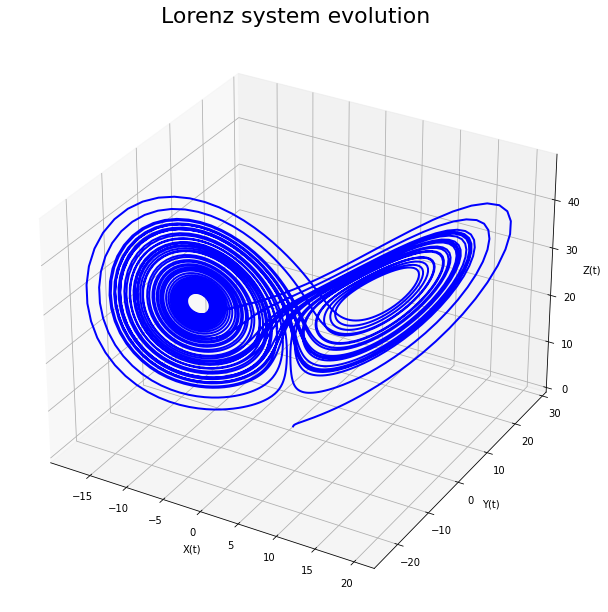

In [27]:

 
numDataPoints = len(psoln[:,0])
 
# GET SOME MATPLOTLIB OBJECTS
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
dataSet = np.array([psoln[:,0], psoln[:,1], psoln[:,2]])
#: Can't pass empty arrays into 3d version of plot()
line2 = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='b')[0] # For line plot
# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
ax.set_xlabel('X(t)')
ax.set_ylabel('Y(t)')
ax.set_zlabel('Z(t)')
ax.set_title('Lorenz system evolution',fontsize=22)
 
# Creating the Animation object
line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(dataSet,line2), interval=50, blit=False)
#line_ani.save(r'Lorenz_system_evolution.mp4')
 
 
plt.show()

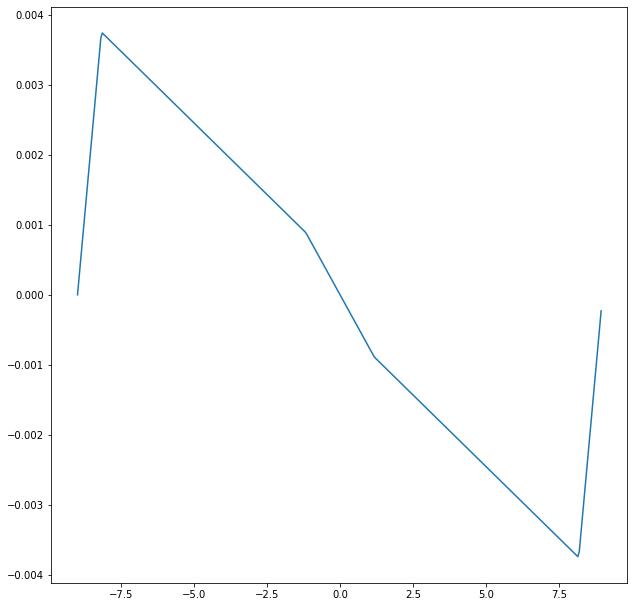

In [39]:
fig1 = plt.figure(1, figsize=(8,8))
ax1 = fig1.add_axes([0,0,1,1])
a = np.arange(-9.0,9.0,0.05)
ax1.plot(a,[l(i) for i in a])

plt.show()
